Running Linear Regression on California Housing dataset...
California Housing - Linear Regression MSE: 1.29


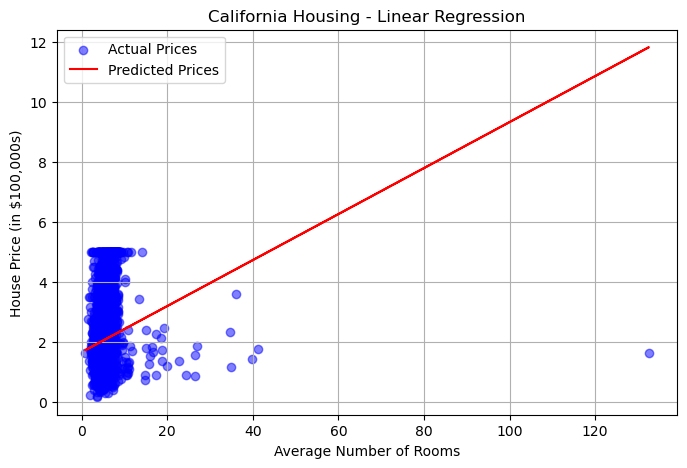


Running Polynomial Regression on Auto MPG dataset...


/tmp/ipykernel_10015/3966780738.py:54: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')


Auto MPG - Polynomial Regression (degree=3) MSE: 18.46


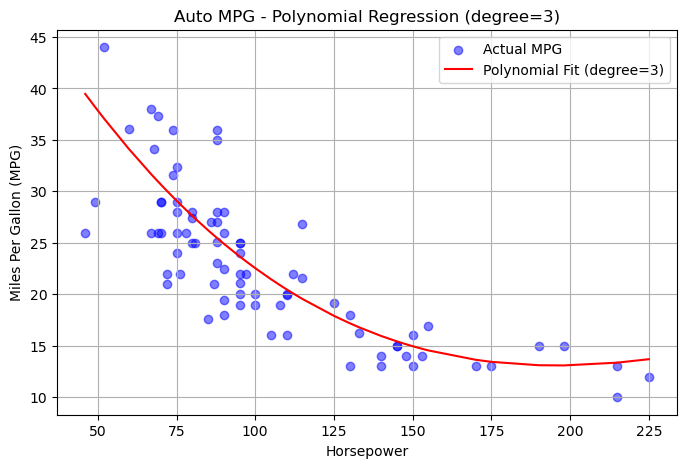

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import seaborn as sns



def linear_regression_boston():
    
    cali = fetch_california_housing()
    X = cali.data
    y = cali.target
    df = pd.DataFrame(X, columns=cali.feature_names)

    
    X_rooms = df[['AveRooms']].values

    
    X_train, X_test, y_train, y_test = train_test_split(X_rooms, y, test_size=0.2, random_state=42)

    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    
    mse = mean_squared_error(y_test, y_pred)
    print(f"California Housing - Linear Regression MSE: {mse:.2f}")

    
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Prices')
    plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('House Price (in $100,000s)')
    plt.title('California Housing - Linear Regression')
    plt.legend()
    plt.grid(True)
    plt.show()



def polynomial_regression_auto_mpg(degree=3):
    
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                    'Acceleration', 'Model Year', 'Origin', 'Car Name']
    df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')
    df.dropna(inplace=True)

    
    X = df[['Horsepower']].astype(float)
    y = df['MPG']

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    poly_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    poly_model.fit(X_train, y_train)
    y_pred = poly_model.predict(X_test)

    
    mse = mean_squared_error(y_test, y_pred)
    print(f"Auto MPG - Polynomial Regression (degree={degree}) MSE: {mse:.2f}")

    
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual MPG')

    
    X_sorted = X_test.sort_values(by='Horsepower')
    y_sorted_pred = poly_model.predict(X_sorted)

    plt.plot(X_sorted, y_sorted_pred, color='red', label=f'Polynomial Fit (degree={degree})')
    plt.xlabel('Horsepower')
    plt.ylabel('Miles Per Gallon (MPG)')
    plt.title(f'Auto MPG - Polynomial Regression (degree={degree})')
    plt.legend()
    plt.grid(True)
    plt.show()



def main():
    print("Running Linear Regression on California Housing dataset...")
    linear_regression_boston()

    print("\nRunning Polynomial Regression on Auto MPG dataset...")
    polynomial_regression_auto_mpg(degree=3)


if __name__ == "__main__":
    main()